In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-10 11:14:11.955020


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1104.4301)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(4.1893)tensor(5.8276)tensor(3.5622)tensor(4.0948)tensor(3.3735)tensor(2.6270)tensor(6.4323)tensor(3.2529)tensor(3.3295)tensor(3.4282)tensor(3.7761)tensor(3.0738)tensor(3.4740)tensor(4.7653)tensor(3.6484)tensor(3.9608)tensor(4.5982)tensor(2.9254)tensor(3.2798)tensor(4.3090)tensor(8.6100)tensor(4.2907)tensor(5.8894)tensor(4.4001)tensor(6.1450)tensor(7.9879)tensor(5.0282)tensor(6.4781)tensor(6.6974)tensor(5.8019)tensor(6.8471)tensor(5.0472)tensor(7.4295)tensor(10.)tensor(4.2747)tensor(3.1458)tensor(7.3618)tensor(7.3165)tensor(4.2761)tensor(5.0385)tensor(3.0883)tensor(4.7483)tensor(5.7101)tensor(3.1299)tensor(3.7773)tensor(3.2959)tensor(6.7904)tensor(7.6443)tensor(7.7789)tensor(5.2676)tensor(2.8375)tensor(3.8202)tensor(3.8564)tensor(3.2673)tensor(5.1260)tensor(4.4349)tensor(4.5406)tensor(4.4599)tensor(4.7267)tensor(5.4360)tensor(3.1359)tensor(4.1648)tensor(5.6629)tensor(7.2243)tensor(5.7849)tensor(3.6187)tensor(3.1787)tensor(3.4080)tensor(3.2189)tensor(5.6653)tensor(3.1958)tensor(3.

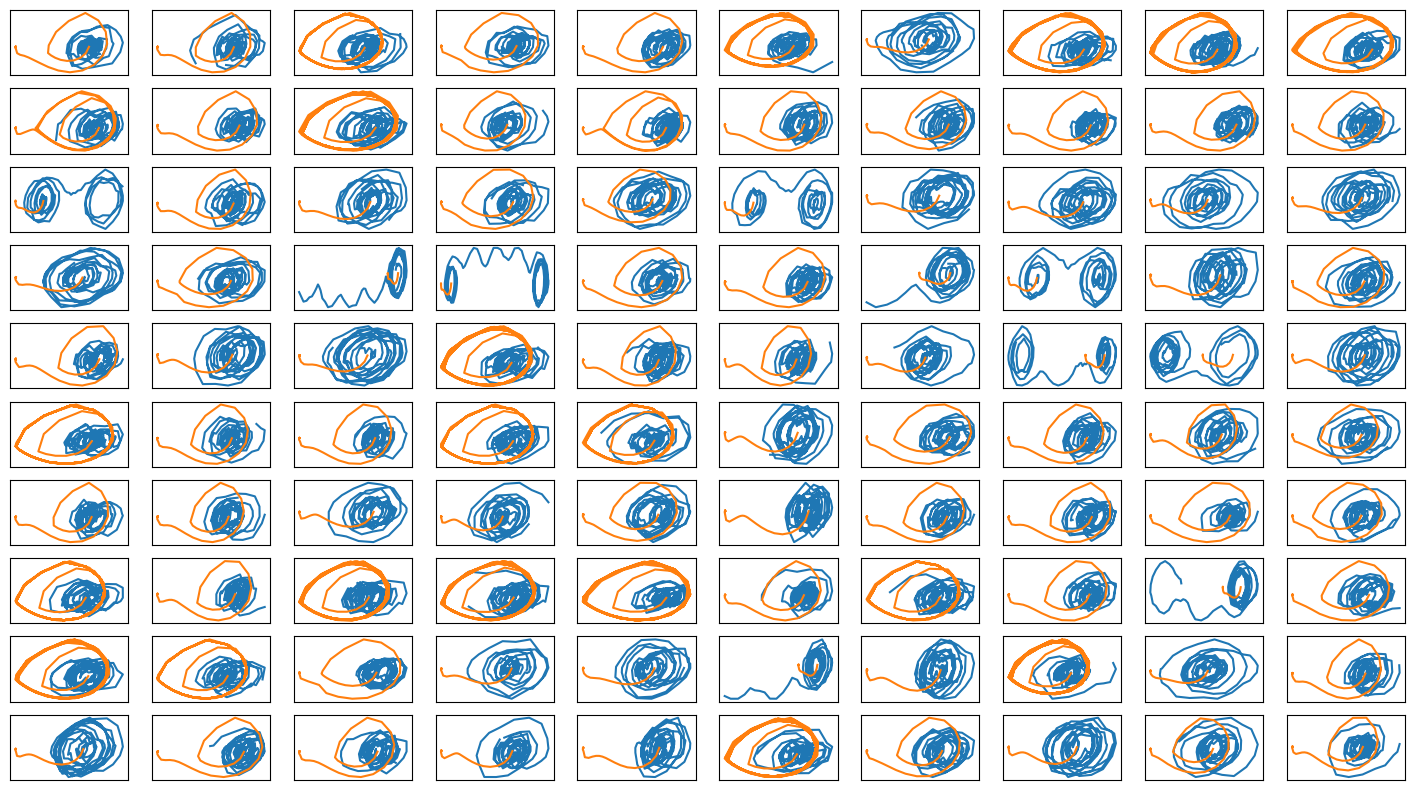

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 518.73596  validloss 520.41847±0.00000  bestvalidloss 520.41847  last_update 0
train: iter 1  trainloss 432.40699  validloss 420.27207±0.00000  bestvalidloss 420.27207  last_update 0
train: iter 2  trainloss 453.54797  validloss 381.33024±0.00000  bestvalidloss 381.33024  last_update 0
train: iter 3  trainloss 381.43631  validloss 364.14948±0.00000  bestvalidloss 364.14948  last_update 0
train: iter 4  trainloss 366.65892  validloss 340.41279±0.00000  bestvalidloss 340.41279  last_update 0
train: iter 5  trainloss 432.64541  validloss 342.45877±0.00000  bestvalidloss 340.41279  last_update 1
train: iter 6  trainloss 353.93706  validloss 330.08332±0.00000  bestvalidloss 330.08332  last_update 0
train: iter 7  trainloss 337.49964  validloss 326.52365±0.00000  bestvalidloss 326.52365  last_update 0
train: iter 8  trainloss 363.81757  validloss 306.63797±0.00000  bestvalidloss 306.63797  last_update 0
train: iter 9  trainloss 421.19047  validloss

train: iter 77  trainloss -619.77784  validloss -768.94244±0.00000  bestvalidloss -794.22625  last_update 1
train: iter 78  trainloss -635.11657  validloss -755.37059±0.00000  bestvalidloss -794.22625  last_update 2
train: iter 79  trainloss -624.12143  validloss -755.62574±0.00000  bestvalidloss -794.22625  last_update 3
train: iter 80  trainloss -635.01142  validloss -770.90830±0.00000  bestvalidloss -794.22625  last_update 4
train: iter 81  trainloss -599.58213  validloss -787.15543±0.00000  bestvalidloss -794.22625  last_update 5
train: iter 82  trainloss -641.01471  validloss -730.92411±0.00000  bestvalidloss -794.22625  last_update 6
train: iter 83  trainloss -587.91045  validloss -811.43940±0.00000  bestvalidloss -811.43940  last_update 0
train: iter 84  trainloss -612.39755  validloss -757.96709±0.00000  bestvalidloss -811.43940  last_update 1
train: iter 85  trainloss -606.57550  validloss -768.09438±0.00000  bestvalidloss -811.43940  last_update 2
train: iter 86  trainloss -6

train: iter 153  trainloss -649.18255  validloss -843.91042±0.00000  bestvalidloss -865.52398  last_update 9
train: iter 154  trainloss -688.73127  validloss -854.57545±0.00000  bestvalidloss -865.52398  last_update 10
train: iter 155  trainloss -682.96691  validloss -817.58438±0.00000  bestvalidloss -865.52398  last_update 11
train: iter 156  trainloss -682.07387  validloss -818.26981±0.00000  bestvalidloss -865.52398  last_update 12
train: iter 157  trainloss -677.73108  validloss -839.38906±0.00000  bestvalidloss -865.52398  last_update 13
train: iter 158  trainloss -670.24445  validloss -817.58700±0.00000  bestvalidloss -865.52398  last_update 14
train: iter 159  trainloss -682.21174  validloss -852.22859±0.00000  bestvalidloss -865.52398  last_update 15
train: iter 160  trainloss -686.36408  validloss -836.31054±0.00000  bestvalidloss -865.52398  last_update 16
train: iter 161  trainloss -665.66931  validloss -784.67266±0.00000  bestvalidloss -865.52398  last_update 17
train: iter

train: iter 228  trainloss 84.22447  validloss 91.28937±0.00000  bestvalidloss -890.41844  last_update 11
train: iter 229  trainloss -448.93375  validloss -283.61872±0.00000  bestvalidloss -890.41844  last_update 12
train: iter 230  trainloss -591.80048  validloss -756.68653±0.00000  bestvalidloss -890.41844  last_update 13
train: iter 231  trainloss -672.14292  validloss -804.87570±0.00000  bestvalidloss -890.41844  last_update 14
train: iter 232  trainloss -679.17398  validloss -839.55481±0.00000  bestvalidloss -890.41844  last_update 15
train: iter 233  trainloss -637.97589  validloss -862.35873±0.00000  bestvalidloss -890.41844  last_update 16
train: iter 234  trainloss -684.47167  validloss -760.58326±0.00000  bestvalidloss -890.41844  last_update 17
train: iter 235  trainloss -698.82043  validloss -848.59187±0.00000  bestvalidloss -890.41844  last_update 18
train: iter 236  trainloss -684.01507  validloss -844.74957±0.00000  bestvalidloss -890.41844  last_update 19
train: iter 23

train: iter 303  trainloss -717.79844  validloss -805.81758±0.00000  bestvalidloss -895.84366  last_update 19
train: iter 304  trainloss -725.45732  validloss -869.92758±0.00000  bestvalidloss -895.84366  last_update 20
train: iter 305  trainloss -743.49492  validloss -871.10635±0.00000  bestvalidloss -895.84366  last_update 21
train: iter 306  trainloss -735.23512  validloss -852.06269±0.00000  bestvalidloss -895.84366  last_update 22
train: iter 307  trainloss -720.03993  validloss -848.74152±0.00000  bestvalidloss -895.84366  last_update 23
train: iter 308  trainloss -723.25036  validloss -811.96838±0.00000  bestvalidloss -895.84366  last_update 24
train: iter 309  trainloss -729.64871  validloss -860.02246±0.00000  bestvalidloss -895.84366  last_update 25
train: iter 310  trainloss -714.79019  validloss -812.61381±0.00000  bestvalidloss -895.84366  last_update 26
train: iter 311  trainloss -720.51712  validloss -899.51353±0.00000  bestvalidloss -899.51353  last_update 0
train: iter

train: iter 379  trainloss -755.01615  validloss -898.82924±0.00000  bestvalidloss -899.51353  last_update 68
train: iter 380  trainloss -760.19607  validloss -846.29891±0.00000  bestvalidloss -899.51353  last_update 69
train: iter 381  trainloss -721.62632  validloss -858.78445±0.00000  bestvalidloss -899.51353  last_update 70
train: iter 382  trainloss -745.29711  validloss -760.00571±0.00000  bestvalidloss -899.51353  last_update 71
train: iter 383  trainloss -732.08649  validloss -799.58186±0.00000  bestvalidloss -899.51353  last_update 72
train: iter 384  trainloss -753.20970  validloss -867.64158±0.00000  bestvalidloss -899.51353  last_update 73
train: iter 385  trainloss -707.98009  validloss -856.62074±0.00000  bestvalidloss -899.51353  last_update 74
train: iter 386  trainloss -735.33096  validloss -824.99893±0.00000  bestvalidloss -899.51353  last_update 75
train: iter 387  trainloss -730.45692  validloss -897.68289±0.00000  bestvalidloss -899.51353  last_update 76
train: ite

train: iter 454  trainloss -767.27173  validloss -862.42371±0.00000  bestvalidloss -909.19084  last_update 54
train: iter 455  trainloss -750.00275  validloss -869.98227±0.00000  bestvalidloss -909.19084  last_update 55
train: iter 456  trainloss -776.34579  validloss -864.67170±0.00000  bestvalidloss -909.19084  last_update 56
train: iter 457  trainloss -741.85808  validloss -870.68022±0.00000  bestvalidloss -909.19084  last_update 57
train: iter 458  trainloss -757.67928  validloss -842.52878±0.00000  bestvalidloss -909.19084  last_update 58
train: iter 459  trainloss -777.97064  validloss -870.07897±0.00000  bestvalidloss -909.19084  last_update 59
train: iter 460  trainloss -763.85633  validloss -876.85608±0.00000  bestvalidloss -909.19084  last_update 60
train: iter 461  trainloss -733.79022  validloss -876.05899±0.00000  bestvalidloss -909.19084  last_update 61
train: iter 462  trainloss -730.67855  validloss -859.30166±0.00000  bestvalidloss -909.19084  last_update 62
train: ite

train: iter 529  trainloss -768.31769  validloss -874.60779±0.00000  bestvalidloss -911.27761  last_update 20
train: iter 530  trainloss -774.47576  validloss -851.22372±0.00000  bestvalidloss -911.27761  last_update 21
train: iter 531  trainloss -718.91273  validloss -910.96947±0.00000  bestvalidloss -911.27761  last_update 22
train: iter 532  trainloss -759.31547  validloss -870.39606±0.00000  bestvalidloss -911.27761  last_update 23
train: iter 533  trainloss -754.81840  validloss -882.53752±0.00000  bestvalidloss -911.27761  last_update 24
train: iter 534  trainloss -779.74918  validloss -881.91658±0.00000  bestvalidloss -911.27761  last_update 25
train: iter 535  trainloss -688.07684  validloss -609.03458±0.00000  bestvalidloss -911.27761  last_update 26
train: iter 536  trainloss -754.56007  validloss -886.93056±0.00000  bestvalidloss -911.27761  last_update 27
train: iter 537  trainloss -761.68492  validloss -825.09069±0.00000  bestvalidloss -911.27761  last_update 28
train: ite

train: iter 604  trainloss -779.04593  validloss -904.06934±0.00000  bestvalidloss -921.19074  last_update 53
train: iter 605  trainloss -775.85468  validloss -867.65948±0.00000  bestvalidloss -921.19074  last_update 54
train: iter 606  trainloss -744.54905  validloss -910.05870±0.00000  bestvalidloss -921.19074  last_update 55
train: iter 607  trainloss -758.20507  validloss -878.33417±0.00000  bestvalidloss -921.19074  last_update 56
train: iter 608  trainloss -777.50475  validloss -865.83509±0.00000  bestvalidloss -921.19074  last_update 57
train: iter 609  trainloss -769.96331  validloss -889.70479±0.00000  bestvalidloss -921.19074  last_update 58
train: iter 610  trainloss -763.86670  validloss -904.55823±0.00000  bestvalidloss -921.19074  last_update 59
train: iter 611  trainloss -772.90819  validloss -751.55254±0.00000  bestvalidloss -921.19074  last_update 60
train: iter 612  trainloss -769.73013  validloss -913.70389±0.00000  bestvalidloss -921.19074  last_update 61
train: ite

train: iter 679  trainloss -775.74502  validloss -843.72015±0.00000  bestvalidloss -921.89909  last_update 48
train: iter 680  trainloss -763.27236  validloss -911.02892±0.00000  bestvalidloss -921.89909  last_update 49
train: iter 681  trainloss -788.97980  validloss -913.03727±0.00000  bestvalidloss -921.89909  last_update 50
train: iter 682  trainloss -774.41938  validloss -894.64204±0.00000  bestvalidloss -921.89909  last_update 51
train: iter 683  trainloss -780.38485  validloss -897.40469±0.00000  bestvalidloss -921.89909  last_update 52
train: iter 684  trainloss -787.98606  validloss -908.21800±0.00000  bestvalidloss -921.89909  last_update 53
train: iter 685  trainloss -767.11626  validloss -915.58808±0.00000  bestvalidloss -921.89909  last_update 54
train: iter 686  trainloss -765.53744  validloss -877.61147±0.00000  bestvalidloss -921.89909  last_update 55
train: iter 687  trainloss -786.44651  validloss -894.92461±0.00000  bestvalidloss -921.89909  last_update 56
train: ite

train: iter 754  trainloss -802.08204  validloss -904.56765±0.00000  bestvalidloss -932.40489  last_update 29
train: iter 755  trainloss -789.53095  validloss -874.53728±0.00000  bestvalidloss -932.40489  last_update 30
train: iter 756  trainloss -797.09217  validloss -910.86982±0.00000  bestvalidloss -932.40489  last_update 31
train: iter 757  trainloss -791.97905  validloss -915.00534±0.00000  bestvalidloss -932.40489  last_update 32
train: iter 758  trainloss -780.99169  validloss -916.31349±0.00000  bestvalidloss -932.40489  last_update 33
train: iter 759  trainloss -783.97903  validloss -792.82858±0.00000  bestvalidloss -932.40489  last_update 34
train: iter 760  trainloss -793.78035  validloss -862.03178±0.00000  bestvalidloss -932.40489  last_update 35
train: iter 761  trainloss -758.58864  validloss -939.81295±0.00000  bestvalidloss -939.81295  last_update 0
train: iter 762  trainloss -787.07296  validloss -842.37501±0.00000  bestvalidloss -939.81295  last_update 1
train: iter 

train: iter 829  trainloss -789.56720  validloss -912.50804±0.00000  bestvalidloss -939.81295  last_update 68
train: iter 830  trainloss -797.10060  validloss -862.41382±0.00000  bestvalidloss -939.81295  last_update 69
train: iter 831  trainloss -789.02087  validloss -925.33186±0.00000  bestvalidloss -939.81295  last_update 70
train: iter 832  trainloss -809.24072  validloss -932.20522±0.00000  bestvalidloss -939.81295  last_update 71
train: iter 833  trainloss -794.13305  validloss -817.22477±0.00000  bestvalidloss -939.81295  last_update 72
train: iter 834  trainloss -803.82036  validloss -888.92192±0.00000  bestvalidloss -939.81295  last_update 73
train: iter 835  trainloss -792.08094  validloss -911.77559±0.00000  bestvalidloss -939.81295  last_update 74
train: iter 836  trainloss -808.48146  validloss -863.82213±0.00000  bestvalidloss -939.81295  last_update 75
train: iter 837  trainloss -802.48533  validloss -916.18423±0.00000  bestvalidloss -939.81295  last_update 76
train: ite

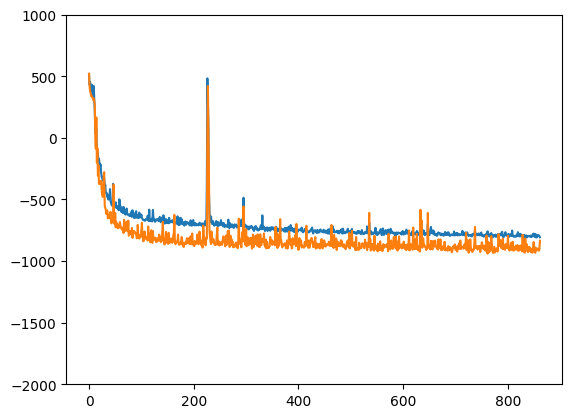

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


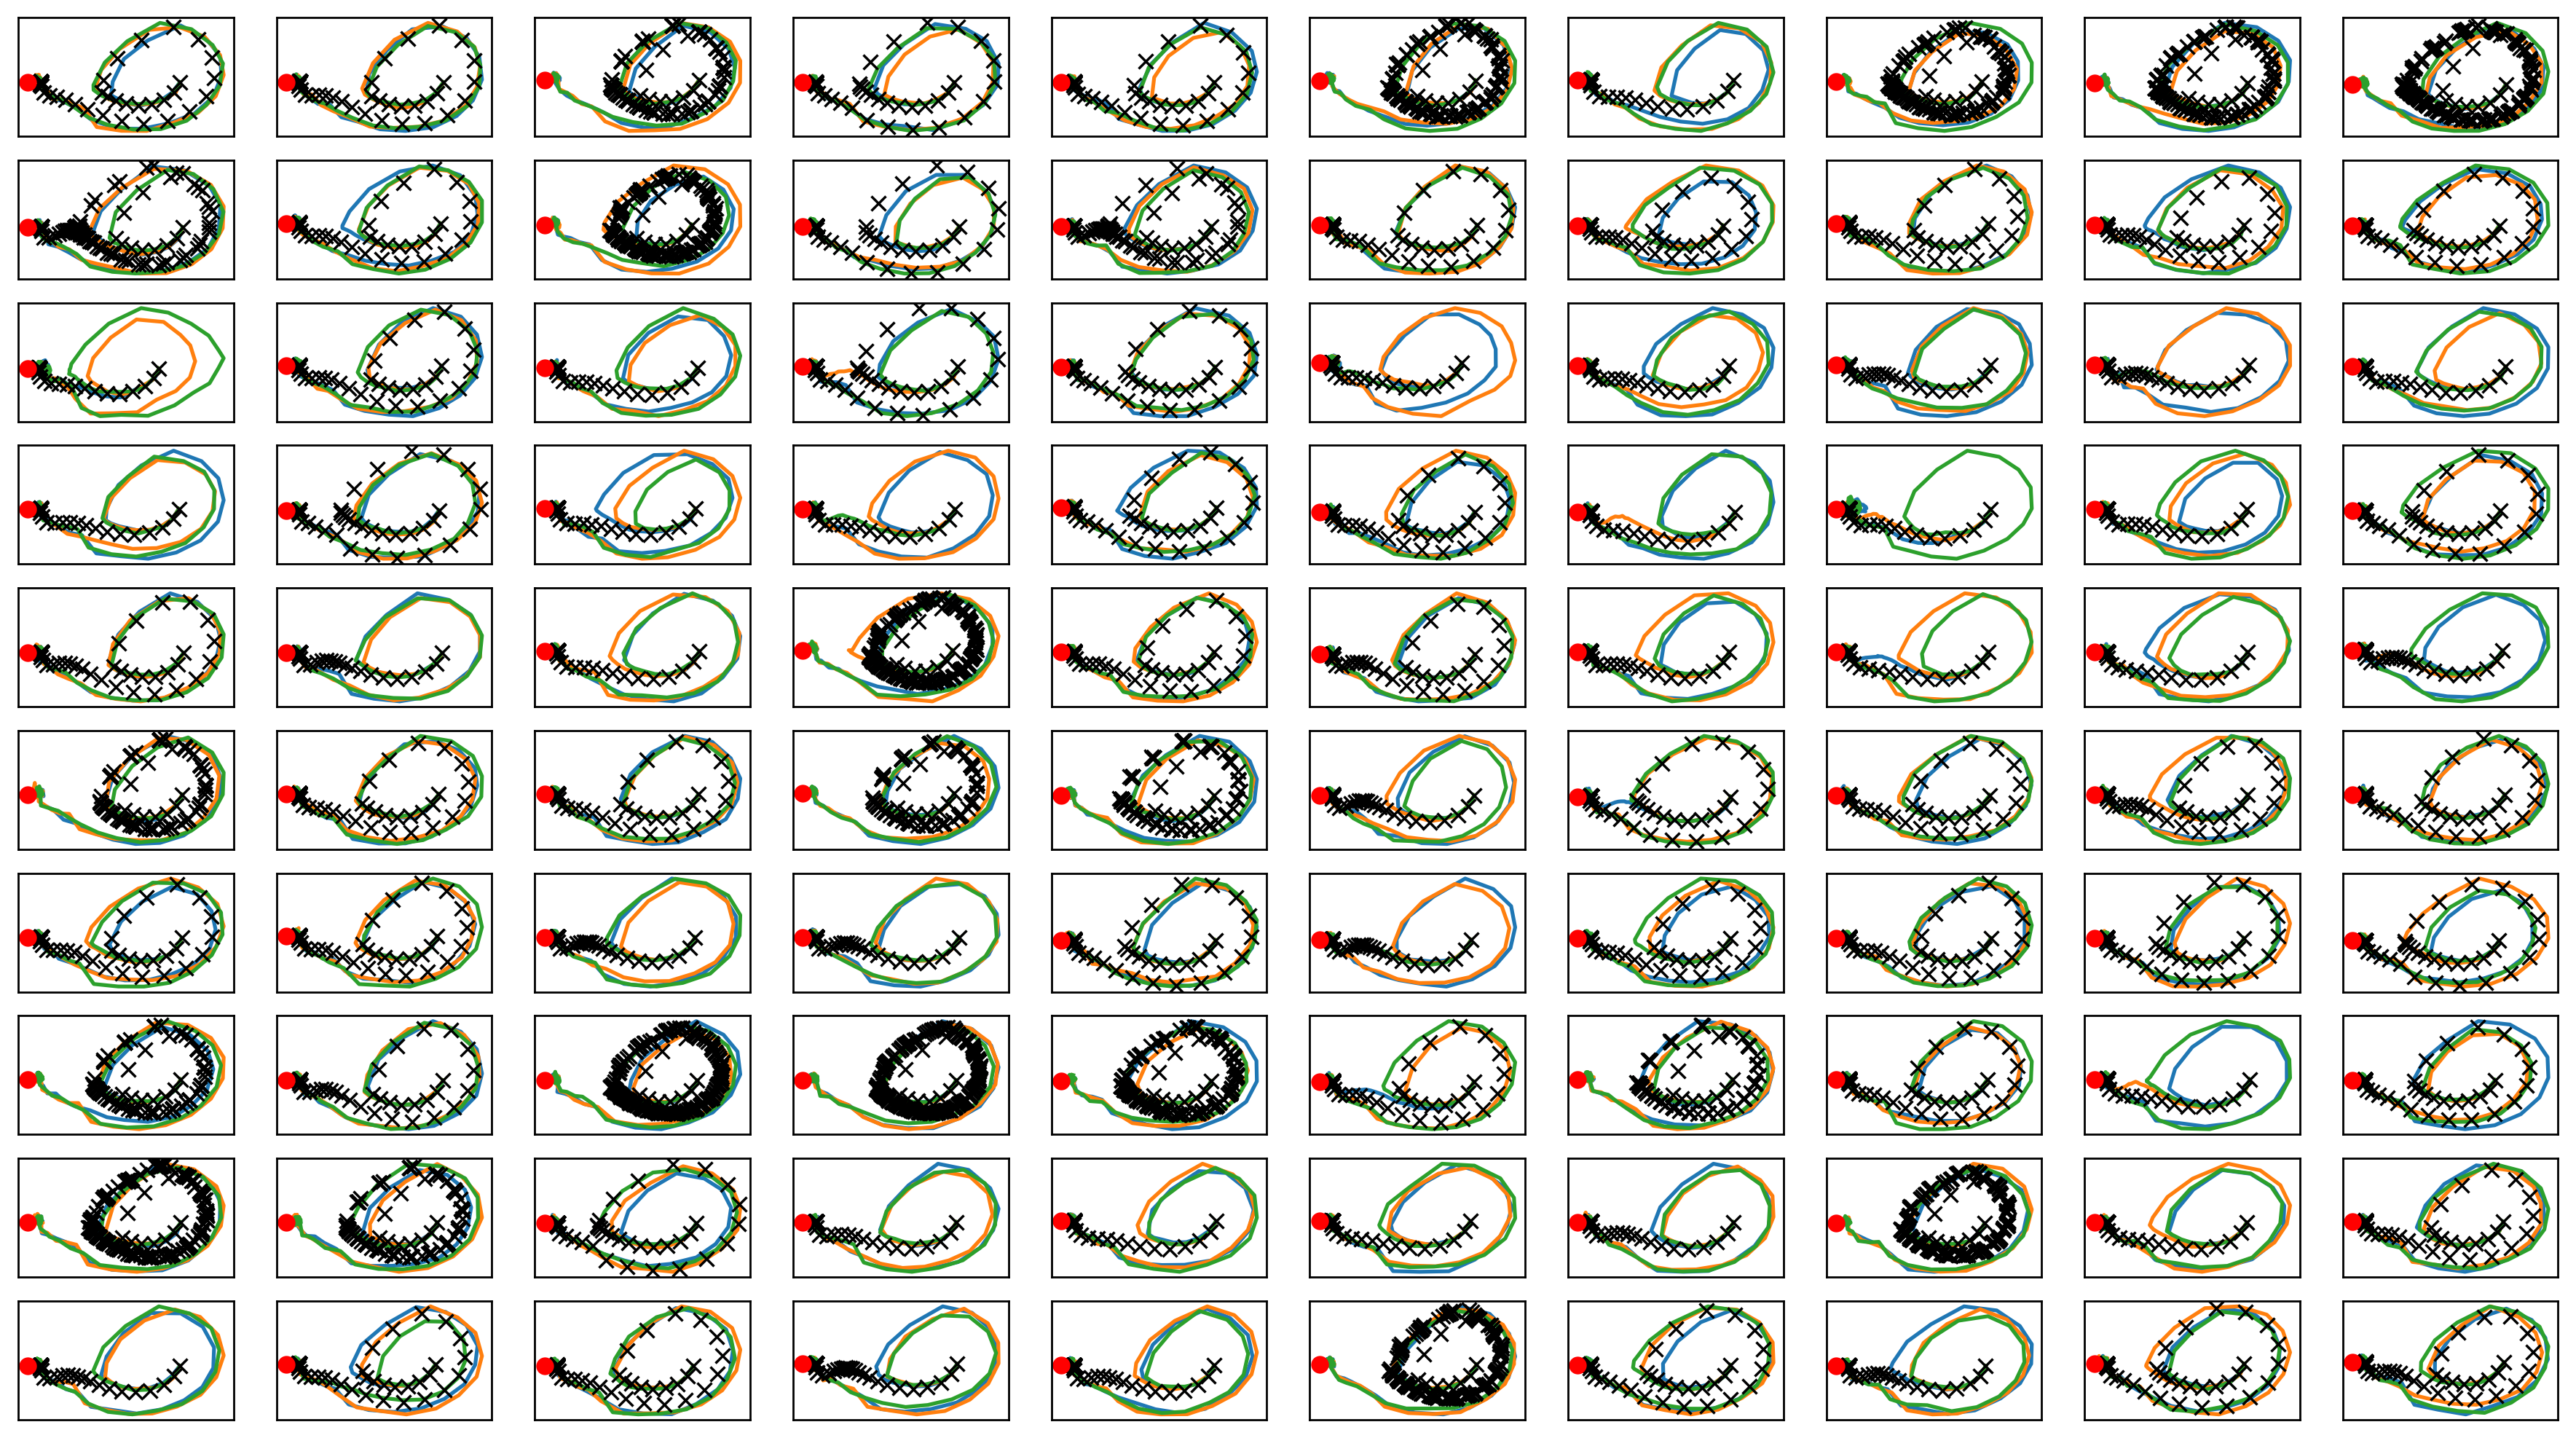

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

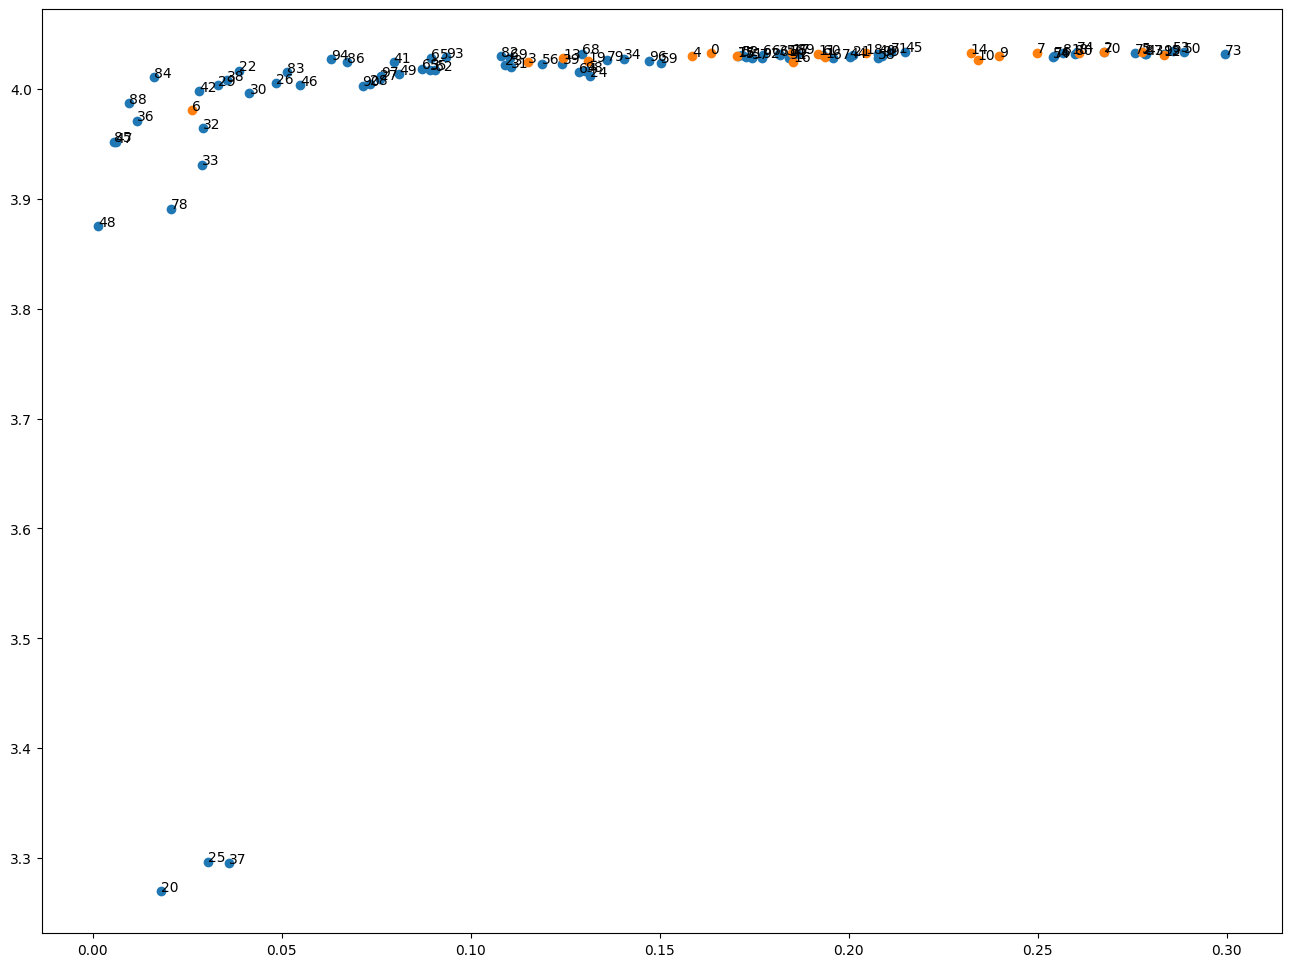

[0.16346495 0.19376823 0.2675319  0.11503246 0.15866848 0.27767899
 0.02613879 0.24978595 0.26100364 0.23974757 0.23415875 0.19197631
 0.28340068 0.12439858 0.23227011 0.17053018 0.18529065 0.1850802
 0.20454609 0.13110959 0.01806764 0.20119136 0.03867789 0.10911323
 0.13158045 0.03061344 0.04839286 0.07598748 0.07332768 0.03311254
 0.04145489 0.11061755 0.02913038 0.02882952 0.14059536 0.18145366
 0.01175634 0.03605897 0.03561832 0.1242789  0.20774164 0.07961685
 0.02818215 0.27878886 0.20022311 0.21489816 0.05495741 0.00603226
 0.00140864 0.08100239 0.28865656 0.1728472  0.17167557 0.2858247
 0.2539226  0.08923109 0.11895172 0.17438186 0.20775948 0.15039731
 0.19319706 0.18191796 0.09047245 0.08702328 0.12863061 0.0894847
 0.17726183 0.19596025 0.12942553 0.11026856 0.26757701 0.21116658
 0.27584478 0.2996541  0.26043782 0.18466787 0.25440247 0.17073022
 0.0207501  0.1360628  0.2599147  0.256741   0.10799342 0.0514889
 0.0163014  0.00555654 0.06717741 0.27842439 0.00955168 0.18644352

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


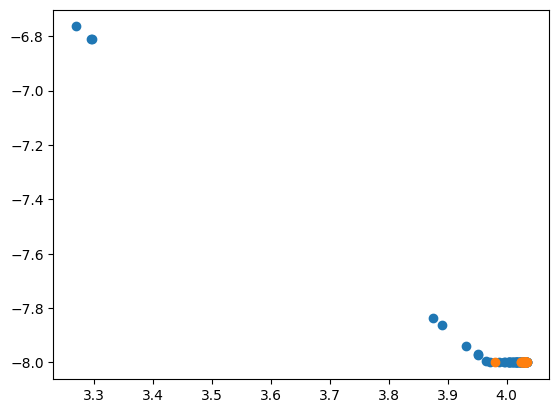

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 8.45236  validloss 9.01075±0.00000  bestvalidloss 9.01075  last_update 0
train: iter 1  trainloss 7.67951  validloss 8.17033±0.00000  bestvalidloss 8.17033  last_update 0
train: iter 2  trainloss 7.01347  validloss 7.44910±0.00000  bestvalidloss 7.44910  last_update 0
train: iter 3  trainloss 6.44638  validloss 6.84249±0.00000  bestvalidloss 6.84249  last_update 0
train: iter 4  trainloss 5.96411  validloss 6.28809±0.00000  bestvalidloss 6.28809  last_update 0
train: iter 5  trainloss 5.55271  validloss 5.85084±0.00000  bestvalidloss 5.85084  last_update 0
train: iter 6  trainloss 5.19258  validloss 5.43909±0.00000  bestvalidloss 5.43909  last_update 0
train: iter 7  trainloss 4.87090  validloss 5.09250±0.00000  bestvalidloss 5.09250  last_update 0
train: iter 8  trainloss 4.58310  validloss 4.77857±0.00000  bestvalidloss 4.77857  last_update 0
train: iter 9  trainloss 4.33844  validloss 4.53278±0.00000  bestvalidloss 4.53278  last_update 0
train: iter 10  trai

train: iter 84  trainloss 0.53132  validloss 0.53322±0.00000  bestvalidloss 0.53322  last_update 0
train: iter 85  trainloss 0.49685  validloss 0.49273±0.00000  bestvalidloss 0.49273  last_update 0
train: iter 86  trainloss 0.45516  validloss 0.45222±0.00000  bestvalidloss 0.45222  last_update 0
train: iter 87  trainloss 0.42101  validloss 0.41235±0.00000  bestvalidloss 0.41235  last_update 0
train: iter 88  trainloss 0.38067  validloss 0.37387±0.00000  bestvalidloss 0.37387  last_update 0
train: iter 89  trainloss 0.34681  validloss 0.33416±0.00000  bestvalidloss 0.33416  last_update 0
train: iter 90  trainloss 0.31152  validloss 0.29622±0.00000  bestvalidloss 0.29622  last_update 0
train: iter 91  trainloss 0.27989  validloss 0.25527±0.00000  bestvalidloss 0.25527  last_update 0
train: iter 92  trainloss 0.23668  validloss 0.21826±0.00000  bestvalidloss 0.21826  last_update 0
train: iter 93  trainloss 0.20339  validloss 0.18243±0.00000  bestvalidloss 0.18243  last_update 0
train: ite

train: iter 166  trainloss -0.48405  validloss -0.85632±0.00000  bestvalidloss -0.86022  last_update 1
train: iter 167  trainloss -0.51892  validloss -0.85173±0.00000  bestvalidloss -0.86022  last_update 2
train: iter 168  trainloss -0.52446  validloss -0.84866±0.00000  bestvalidloss -0.86022  last_update 3
train: iter 169  trainloss -0.54918  validloss -0.86811±0.00000  bestvalidloss -0.86811  last_update 0
train: iter 170  trainloss -0.52322  validloss -0.86558±0.00000  bestvalidloss -0.86811  last_update 1
train: iter 171  trainloss -0.52000  validloss -0.86651±0.00000  bestvalidloss -0.86811  last_update 2
train: iter 172  trainloss -0.52938  validloss -0.86846±0.00000  bestvalidloss -0.86846  last_update 0
train: iter 173  trainloss -0.49236  validloss -0.88407±0.00000  bestvalidloss -0.88407  last_update 0
train: iter 174  trainloss -0.51653  validloss -0.86625±0.00000  bestvalidloss -0.88407  last_update 1
train: iter 175  trainloss -0.53404  validloss -0.88510±0.00000  bestvali

train: iter 251  trainloss -0.51168  validloss -0.95696±0.00000  bestvalidloss -0.96286  last_update 12
train: iter 252  trainloss -0.52197  validloss -0.96811±0.00000  bestvalidloss -0.96811  last_update 0
train: iter 253  trainloss -0.53706  validloss -0.95125±0.00000  bestvalidloss -0.96811  last_update 1
train: iter 254  trainloss -0.48027  validloss -0.95763±0.00000  bestvalidloss -0.96811  last_update 2
train: iter 255  trainloss -0.54410  validloss -0.96837±0.00000  bestvalidloss -0.96837  last_update 0
train: iter 256  trainloss -0.51414  validloss -0.94656±0.00000  bestvalidloss -0.96837  last_update 1
train: iter 257  trainloss -0.56480  validloss -0.95604±0.00000  bestvalidloss -0.96837  last_update 2
train: iter 258  trainloss -0.54298  validloss -0.95058±0.00000  bestvalidloss -0.96837  last_update 3
train: iter 259  trainloss -0.50013  validloss -0.96113±0.00000  bestvalidloss -0.96837  last_update 4
train: iter 260  trainloss -0.53142  validloss -0.94770±0.00000  bestval

train: iter 335  trainloss -0.50216  validloss -0.98716±0.00000  bestvalidloss -0.99393  last_update 3
train: iter 336  trainloss -0.55975  validloss -0.96685±0.00000  bestvalidloss -0.99393  last_update 4
train: iter 337  trainloss -0.55056  validloss -0.97971±0.00000  bestvalidloss -0.99393  last_update 5
train: iter 338  trainloss -0.51536  validloss -0.97714±0.00000  bestvalidloss -0.99393  last_update 6
train: iter 339  trainloss -0.49596  validloss -0.98599±0.00000  bestvalidloss -0.99393  last_update 7
train: iter 340  trainloss -0.54336  validloss -0.97188±0.00000  bestvalidloss -0.99393  last_update 8
train: iter 341  trainloss -0.54167  validloss -0.95051±0.00000  bestvalidloss -0.99393  last_update 9
train: iter 342  trainloss -0.53084  validloss -0.95978±0.00000  bestvalidloss -0.99393  last_update 10
train: iter 343  trainloss -0.51358  validloss -0.97424±0.00000  bestvalidloss -0.99393  last_update 11
train: iter 344  trainloss -0.47662  validloss -0.97596±0.00000  bestva

train: iter 422  trainloss -0.51813  validloss -0.99009±0.00000  bestvalidloss -0.99393  last_update 90
train: iter 423  trainloss -0.50002  validloss -0.96455±0.00000  bestvalidloss -0.99393  last_update 91
train: iter 424  trainloss -0.56692  validloss -0.97792±0.00000  bestvalidloss -0.99393  last_update 92
train: iter 425  trainloss -0.53241  validloss -0.96039±0.00000  bestvalidloss -0.99393  last_update 93
train: iter 426  trainloss -0.50367  validloss -0.97287±0.00000  bestvalidloss -0.99393  last_update 94
train: iter 427  trainloss -0.54062  validloss -0.97593±0.00000  bestvalidloss -0.99393  last_update 95
train: iter 428  trainloss -0.51388  validloss -0.98307±0.00000  bestvalidloss -0.99393  last_update 96
train: iter 429  trainloss -0.50022  validloss -0.97144±0.00000  bestvalidloss -0.99393  last_update 97
train: iter 430  trainloss -0.55437  validloss -0.97488±0.00000  bestvalidloss -0.99393  last_update 98
train: iter 431  trainloss -0.56007  validloss -0.96869±0.00000 

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([ 3.9897, -3.8874], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 14.94290  validloss 24.30943±0.00000  bestvalidloss 24.30943  last_update 0
train: iter 1  trainloss 7.60335  validloss 13.49794±0.00000  bestvalidloss 13.49794  last_update 0
train: iter 2  trainloss 4.17620  validloss 6.12248±0.00000  bestvalidloss 6.12248  last_update 0
train: iter 3  trainloss 3.15801  validloss 3.45424±0.00000  bestvalidloss 3.45424  last_update 0
train: iter 4  trainloss 2.86473  validloss 2.25622±0.00000  bestvalidloss 2.25622  last_update 0
train: iter 5  trainloss 2.76344  validloss 1.77980±0.00000  bestvalidloss 1.77980  last_update 0
train: iter 6  trainloss 2.77257  validloss 1.56844±0.00000  bestvalidloss 1.56844  last_update 0
train: iter 7  trainloss 2.71290  validloss 1.43162±0.00000  bestvalidloss 1.43162  last_update 0
train: iter 8  trainloss 2.67989  validloss 1.43113±0.00000  bestvalidloss 1.43113  last_update 0
train: iter 9  trainloss 2.68534  validloss 1.38630±0.00000  bestvalidloss 1.38630  last_update 0
train: iter 10 

train: iter 84  trainloss 1.87154  validloss 0.83131±0.00000  bestvalidloss 0.72263  last_update 7
train: iter 85  trainloss 1.90313  validloss 0.81988±0.00000  bestvalidloss 0.72263  last_update 8
train: iter 86  trainloss 1.89951  validloss 0.87583±0.00000  bestvalidloss 0.72263  last_update 9
train: iter 87  trainloss 1.90272  validloss 0.86794±0.00000  bestvalidloss 0.72263  last_update 10
train: iter 88  trainloss 1.90919  validloss 0.78308±0.00000  bestvalidloss 0.72263  last_update 11
train: iter 89  trainloss 1.91513  validloss 0.76926±0.00000  bestvalidloss 0.72263  last_update 12
train: iter 90  trainloss 1.92078  validloss 0.85616±0.00000  bestvalidloss 0.72263  last_update 13
train: iter 91  trainloss 1.88047  validloss 0.77115±0.00000  bestvalidloss 0.72263  last_update 14
train: iter 92  trainloss 1.88406  validloss 0.78775±0.00000  bestvalidloss 0.72263  last_update 15
train: iter 93  trainloss 1.90550  validloss 0.83048±0.00000  bestvalidloss 0.72263  last_update 16
tra

train: iter 167  trainloss 1.79896  validloss 0.74829±0.00000  bestvalidloss 0.72263  last_update 90
train: iter 168  trainloss 1.84146  validloss 0.78082±0.00000  bestvalidloss 0.72263  last_update 91
train: iter 169  trainloss 1.78847  validloss 0.92108±0.00000  bestvalidloss 0.72263  last_update 92
train: iter 170  trainloss 1.80407  validloss 0.78410±0.00000  bestvalidloss 0.72263  last_update 93
train: iter 171  trainloss 1.83160  validloss 0.74533±0.00000  bestvalidloss 0.72263  last_update 94
train: iter 172  trainloss 1.83870  validloss 0.74206±0.00000  bestvalidloss 0.72263  last_update 95
train: iter 173  trainloss 1.79773  validloss 0.86822±0.00000  bestvalidloss 0.72263  last_update 96
train: iter 174  trainloss 1.82737  validloss 0.93266±0.00000  bestvalidloss 0.72263  last_update 97
train: iter 175  trainloss 1.80797  validloss 1.03106±0.00000  bestvalidloss 0.72263  last_update 98
train: iter 176  trainloss 1.82723  validloss 0.81322±0.00000  bestvalidloss 0.72263  last_

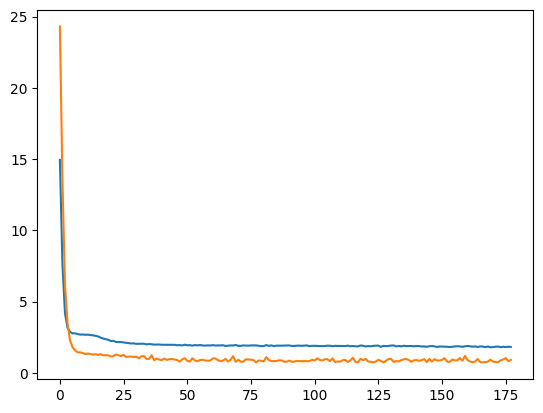

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(0.1023)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(2.1028)


In [21]:
print(vi.h_min_tilde)

-5.840628


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

1.271910594734969
tensor([0.5385])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

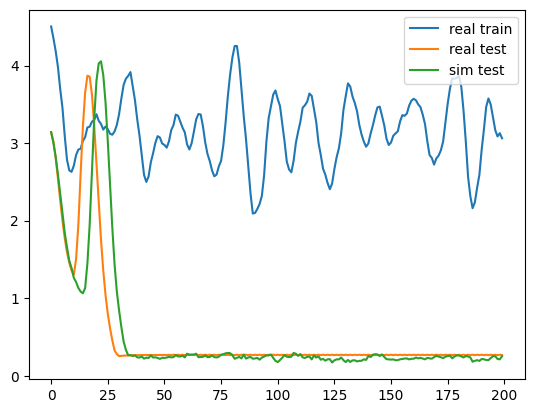

encoder [ 4.0256863 -8.       ]
initial_belief tensor([ 3.9897, -3.8874])
real train tensor([ 4.0251, -8.0000])
real test tensor([ 4.0377, -8.0031])
sim tensor([ 3.9815, -3.9050])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.0


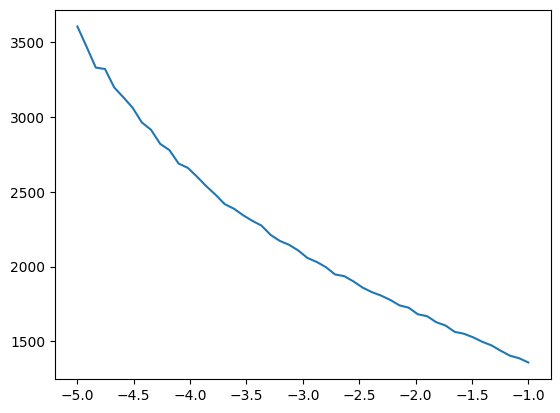

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.9945098562733428
tensor([-1.2660])
